# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [7]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [8]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [17]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_count
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,2
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,29
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,16
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,96
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
# Write your code here
df.info()

'''
order_id: int64
customer_id: int64
restaurant_name: object
cuisine_type: object
cost_of_the_order: float64
day_of_the_week: object
rating: object
food_preparation_time: int64
delivery_time: int64
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# Write your code here

# The rating column is supposed to contain numbers, so replace non-numeric values with NaN
# I tried using each restaurant's mean rating in place of NaN but it skewed the data too much
# when later calculating rating means for question 13.  I deliberately chose to leave them as NaN.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time             

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
# Write your code here
df.describe()

'''
Min: 20 minuts
Mean: 27 minutes
Max: 35 minutes
'''

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [89]:
# Write the code here
df['rating'].isna().sum()

# 736 orders are not rated

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Unique order ids: 1898
Unique customer ids: 1200
Unique restaurant names: 178
Unique cusines: 14


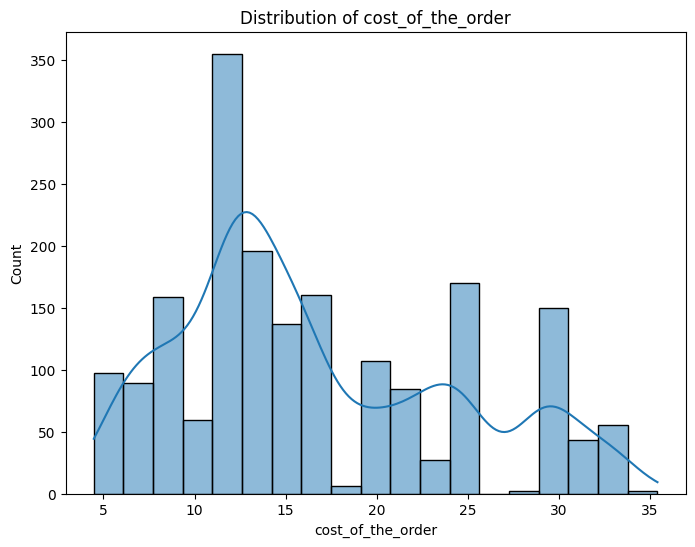

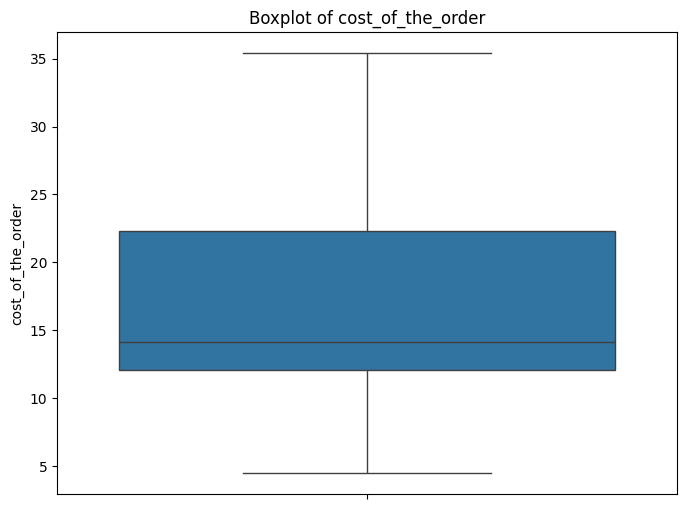

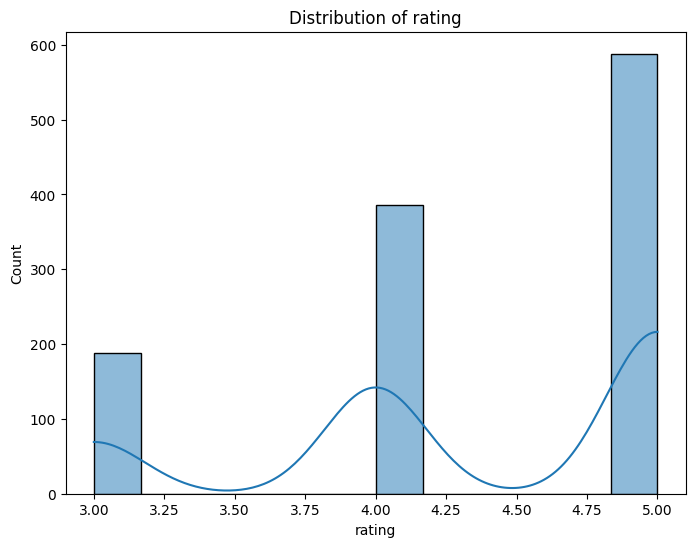

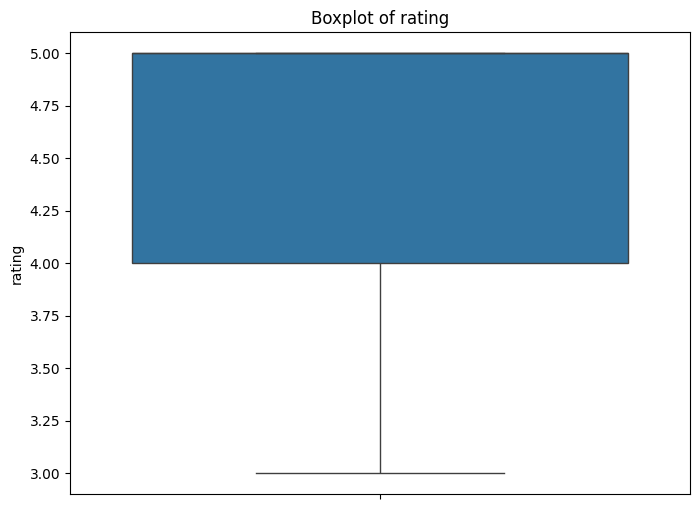

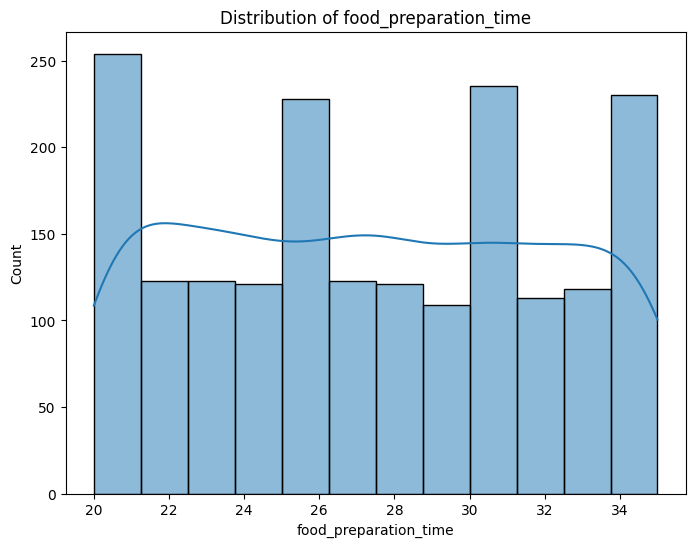

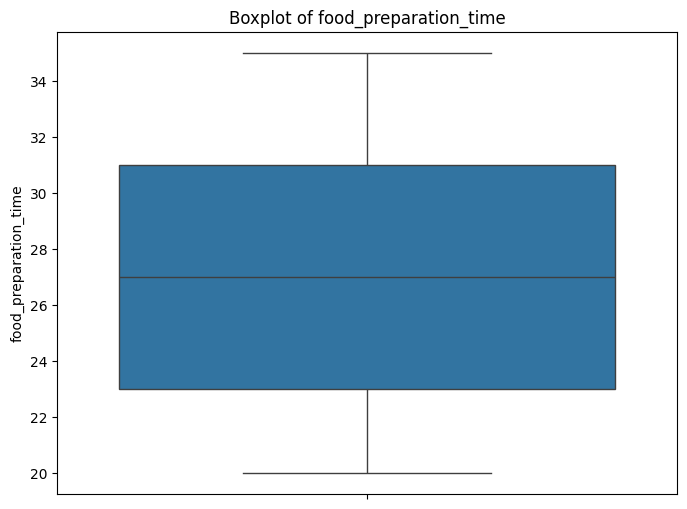

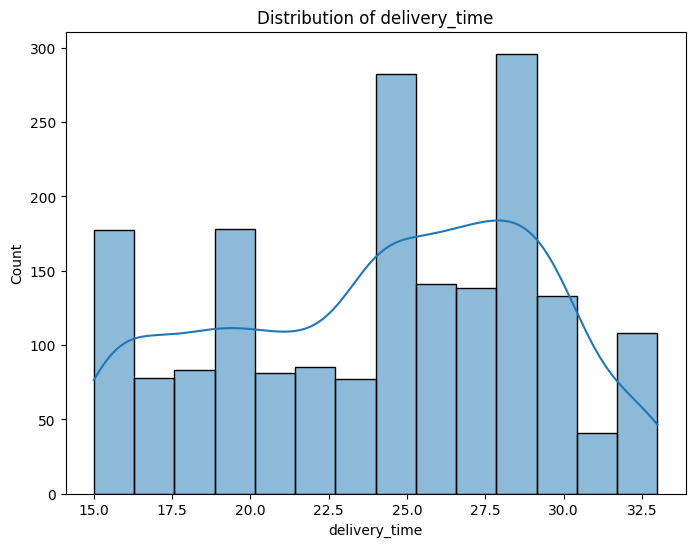

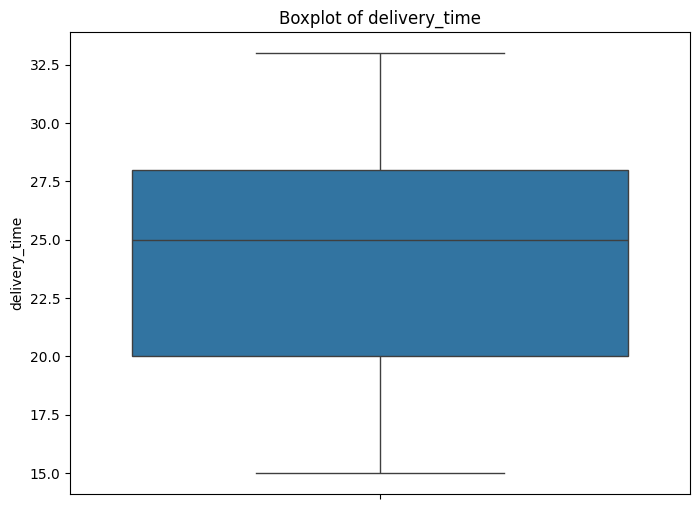

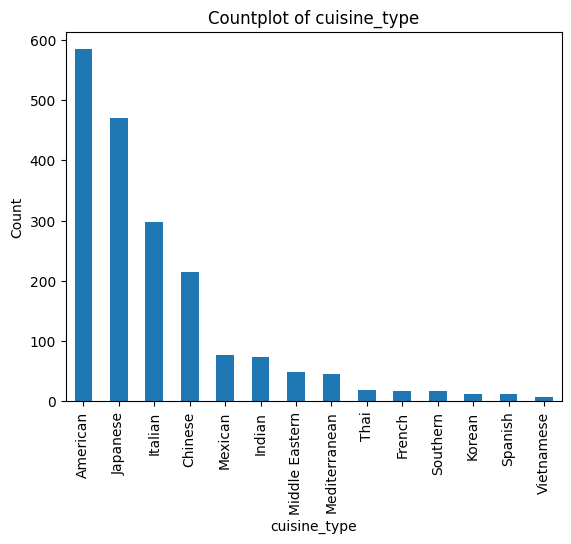

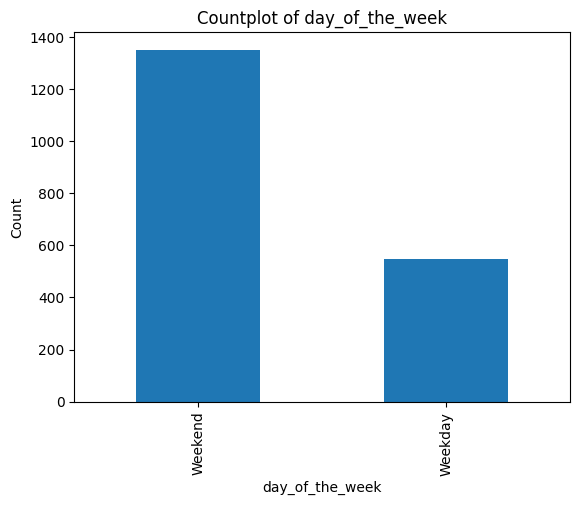

'\n  Order_id, customer_id, and restaurant_name: Every order is unique, most customers are unique. 178 restaurants and 14 cuisines.\n  Cost of the order: Is skewed to the right and is not symmetric, but there are no outliers\n  Food preparation time: Is fairly symmetric and not highly skewed.  There are no outliers\n  Delivery time: Is slightly skewed to the left and is not symmetric. There are no outliers\n  Cuisine Type: American and Japanese are the most popular, while Spanish and Vietnamese are the least popular\n  Day of the week: More than twice the orders are placed on the weekend compared to weekdays\n  Rating: Many orders have not been rated, but of those that have, most are 5 stars.  There are no 1- or 2-star ratings.\n'

In [17]:
# Write the code here
print(f"Unique order ids: {df['order_id'].nunique()}")
print(f"Unique customer ids: {df['customer_id'].nunique()}")
print(f"Unique restaurant names: {df['restaurant_name'].nunique()}")
print(f"Unique cusines: {df['cuisine_type'].nunique()}")

numerical_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
for col in numerical_cols:
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

categorical_cols = ['cuisine_type', 'day_of_the_week']
for col in categorical_cols:
    # Create a barplot
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

'''
  Order_id, customer_id, and restaurant_name: Every order is unique, most customers are unique. 178 restaurants and 14 cuisines.
  Cost of the order: Is skewed to the right and is not symmetric, but there are no outliers
  Food preparation time: Is fairly symmetric and not highly skewed.  There are no outliers
  Delivery time: Is slightly skewed to the left and is not symmetric. There are no outliers
  Cuisine Type: American and Japanese are the most popular, while Spanish and Vietnamese are the least popular
  Day of the week: More than twice the orders are placed on the weekend compared to weekdays
  Rating: Many orders have not been rated, but of those that have, most are 5 stars.  There are no 1- or 2-star ratings.
'''

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
# Write the code here
restaurant_counts = df['restaurant_name'].value_counts()
top_restaurants = restaurant_counts.head(5)
print(top_restaurants)
'''
Top 5 restaurants:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
'''

# How many restaurants have only received 1 order?
count = (restaurant_counts == 1).sum()
print(f'Single order restaurants: {count}')
# 50 restaurants only received 1 order!

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64
Single order restaurants: 50


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Write the code here
top_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)
top_cuisine
# American

,count
cuisine_type,
American,415


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Write the code here
high_cost_orders = df[df['cost_of_the_order'] > 20]
high_cost_percentage = (len(high_cost_orders) / len(df)) * 100
high_cost_percentage
# 29.2 percent of the orders cost more than 20 dollars

555
1898


29.24130663856691

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Write the code here
df['delivery_time'].mean()
# Mean delivery time is 24 minutes

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)
top_customers
'''
Top 3 customers:
52832	13
47440	10
83287	9
'''

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


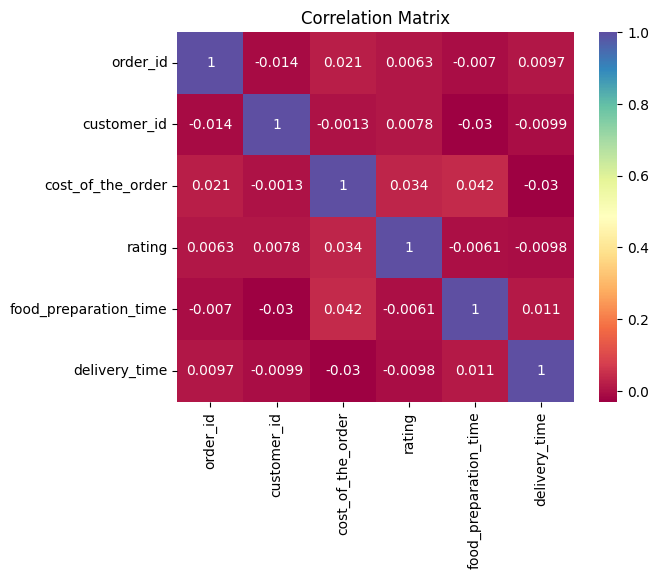

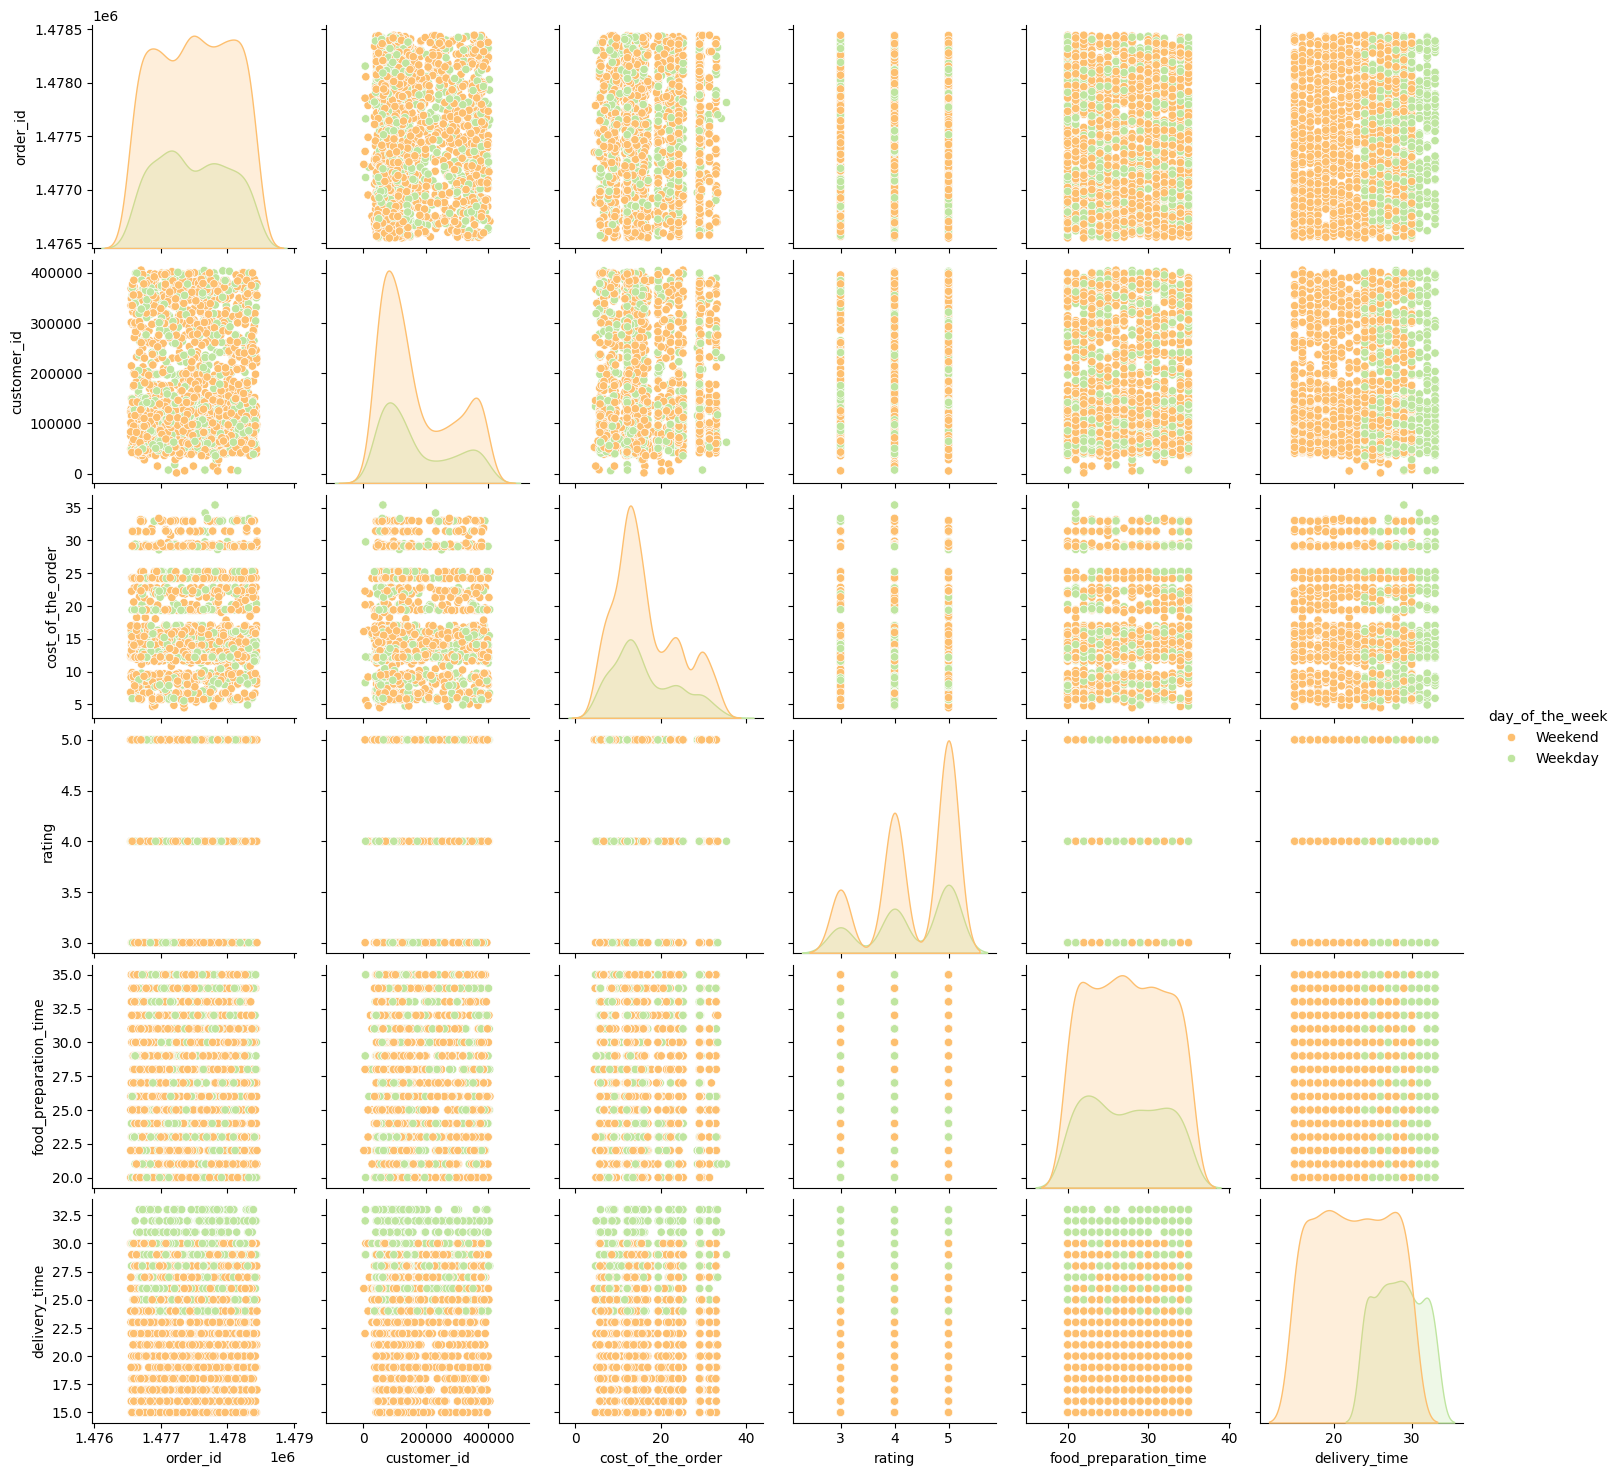

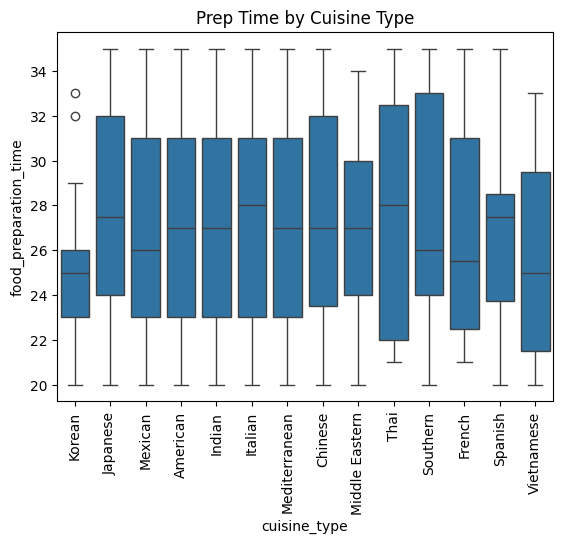

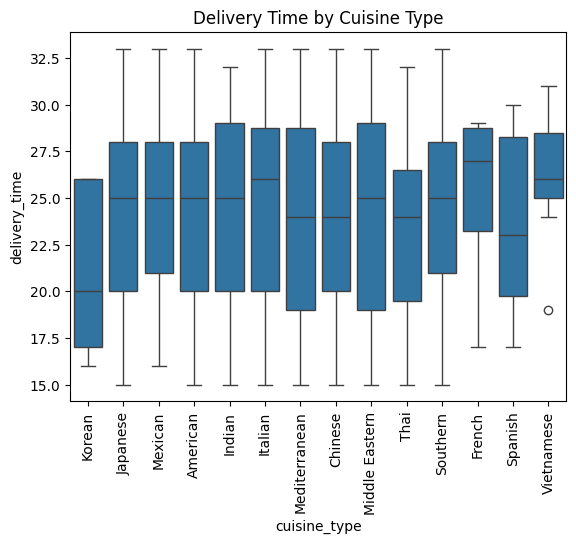

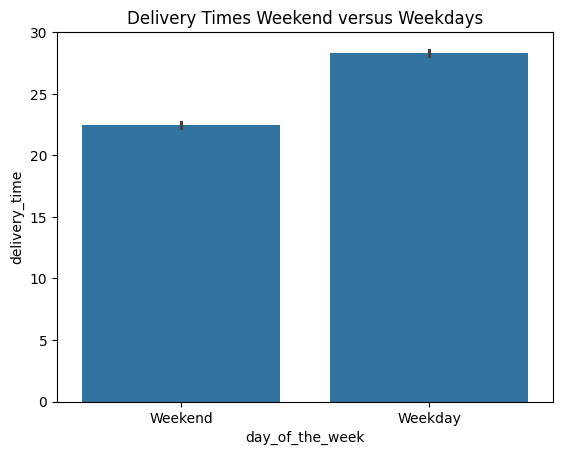

In [24]:
# Write the code here

# Use a correlation heatmap to find relationships between numeric variables
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

# Use a pairplot for detecting patterns and clusters for all numeric variables
# Shows that delivery times are longer on weekdays
sns.pairplot(df, hue='day_of_the_week', palette='Spectral')
plt.show()

# Use a boxplot to see numerical distributions across a category
# This example could help estimate future food prep time to let customers know approximate waiting times by cuisine
# Customers in a hurry could be steered towards Korean cuisine for example
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title('Prep Time by Cuisine Type')
plt.show()

# Same goes for this exploration
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title('Delivery Time by Cuisine Type')
plt.show()

# Use a barplot to compare averages of a numeric variable to a category
sns.barplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Times Weekend versus Weekdays')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [132]:
# Write the code here
# Group by restaurant name and calculate count and mean of ratings
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants with more than 50 ratings and an average rating above 4
filtered_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Get the unique restaurant names
unique_restaurants = filtered_restaurants.index.tolist()

# Print the results
print(unique_restaurants)

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [92]:
# Write the code here
net_revenue = df['cost_of_the_order'].transform(lambda x: x * 0.25 if x > 20 else x * 0.15)
print(net_revenue.sum())

6172.714


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
# Write the code here
df['total_time'] = (df['food_preparation_time'] + df['delivery_time'])
high_delivery_time = df['total_time'] > 60
high_delivery_percentage = (len(high_delivery_time[high_delivery_time == True]) / len(df)) * 100
print(f'High Delivery Time Percentage: {high_delivery_percentage}')

# Which restaurants are the worst repeat offenders for slow orders?
# Filter rows where the total time is greater than 60
df_slow = df[df['total_time'] > 60]
# Group by restaurant_name and count the number of orders > 60
order_count = df_slow.groupby('restaurant_name')['order_id'].count()
# Sort the result in descending order based on order count
ordered_restaurants = order_count.sort_values(ascending=False)

print(f"\nSlowest restaurants and number of orders over an hour:\n {ordered_restaurants.head(5)}")

# Which restaurants are the fastest?
df_time_mean = df.groupby('restaurant_name')['total_time'].mean().sort_values()
print(f"\nFastest restaurants and mean total time:\n {df_time_mean.head(5)}")

High Delivery Time Percentage: 10.537407797681771

Slowest restaurants and number of orders over an hour:
 restaurant_name
Shake Shack          26
Blue Ribbon Sushi    19
The Meatball Shop    13
RedFarm Broadway      8
Parm                  6
Name: order_id, dtype: int64

Fastest restaurants and mean total time:
 restaurant_name
Wo Hop Restaurant    38.0
Market Table         38.0
Galli Restaurant     38.0
Samurai Mama         39.0
DespaÌ±a             40.0
Name: total_time, dtype: float64


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


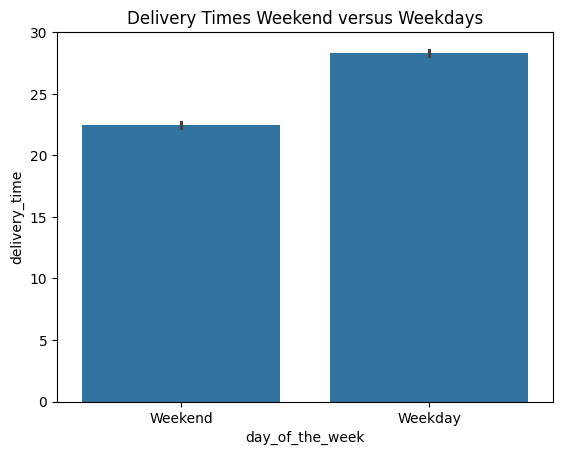

In [77]:
# Write the code here
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery)

# Use a barplot to compare averages of a numeric variable to a category
sns.barplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Times Weekend versus Weekdays')
plt.show()

# Orders are likely delivered roughly 6 minutes more quickly on weekends due to the lack of traffic.

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
I analyzed a dataset of nearly 2,000 FoodHub orders from 178 New York restaurants.  I reached the following conclusions


*   The app is currently offering a wide range of prices to customers, which likely increases the appeal to customers.
*   The app is being used twice as frequently on the weekend as on weekdays.
*   Only about half of the orders were rated, which limits the effectiveness of using our dataset to make recommendations to customers.
*   More than 10% of orders taken longer than an hour to reach customers, however, a handful of restaurants are repeat offenders.
*   50 of the participating restaurants have only received a single order.
* The fastest restaurants take 38 minutes to prep and delivery food, while the slowest take over an hour. Korean cuisine has the lowest mean time for both.



### Recommendations:

*  To grow new business, I would suggest partnering with restaurants that are near large commercial areas or buildings where many people will want to order lunch on weekdays, then advertise to these businesses. This is an underserved market as the majority of orders placed on the app are during weekends.
*  Ensure that delivery personnel are adequately staffed and placed to ensure timely delivery.  There are a few restaurants which repeatedly have had order times of longer than an hour. Focus on those first to ensure adequate staffing, and work with the owners to improve food preparation speed.
*  I suggest offering an incentive for users to rate their orders. This not only gives better data insights, it would also be an opportunity for advertising testimonials for the app.
*  It is not worthwhile to remain partered with with one-order restaurants as it is likely not profitable when considering overhead costs. I recommend seeking new, more popular restaurants to partner with instead, particularly those serving American or Japanese cuisine, as that's the most popular, and restaurants near commercial zones (as above), while ending partnerships with the 50 one-order restaurants.
*Consider creating a feature showing the average time for a customer to get food to help in restaurant selection and forewarn customers that certain restaurants can have a long lead time.

---